# For our mini-project, we plan to analyse how the Purchasing Power Parity (PPP) of various countries are affected by the local price of a Big Mac (in USD) and the average gold price in their country. 

### Big Mac Index = Local Price Of Big Mac in USD / price of a Big Mac in USA


In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

In [2]:
Macdata = pd.read_csv('bigmac.csv')
Macdata.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_dollar,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
0,2000-04-01,ARG,ARS,Argentina,2.50,1.00,2.500000,-0.00398,0.05007,-0.16722,-0.09864,1.09091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-04-01,AUS,AUD,Australia,2.59,1.68,1.541667,-0.38579,-0.35246,-0.48645,-0.44416,0.28939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-04-01,BRA,BRL,Brazil,2.95,1.79,1.648045,-0.34341,-0.30778,-0.45102,-0.40581,0.37836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-04-01,CAN,CAD,Canada,2.85,1.47,1.938776,-0.22758,-0.18566,-0.35417,-0.30099,0.62152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-04-01,CHE,CHF,Switzerland,5.90,1.70,3.470588,0.38270,0.45774,0.15609,0.25130,1.90267,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
Mac = pd.DataFrame(Macdata[["date", "name", "dollar_ex", "local_price","dollar_price"]])
Mac.head()

,date,name,dollar_ex,local_price,dollar_price
0,2000-04-01,Argentina,1.00,2.50,2.500000
1,2000-04-01,Australia,1.68,2.59,1.541667
2,2000-04-01,Brazil,1.79,2.95,1.648045
3,2000-04-01,Canada,1.47,2.85,1.938776
4,2000-04-01,Switzerland,1.70,5.90,3.470588


In [4]:
from datetime import datetime

# Define a function to extract the year
def extract_year(date_string):
    date_object = datetime.strptime(date_string, '%Y-%m-%d')
    return date_object.year

# Apply the function to the date column
Mac['Year'] = Mac['date'].apply(lambda x: extract_year(x))

# Drop the original date column if needed
Mac.drop(columns=['date'], inplace=True)

specific_rows = Mac.iloc[1276:1332]  # Select rows 1276 to 1332, inclusive
#the Year values from row 1276 to 1332 in the dataset are #, but should be 2020, 
#now in our clean dataset, it is filled with 2020.
print(specific_rows)

                      name     dollar_ex  local_price  dollar_price  Year
1276             Australia      1.449065        6.450      4.451145  2020
1277            Azerbaijan      1.696500        3.950      2.328323  2020
1278               Bahrain      0.377000        1.400      3.713528  2020
1279                Brazil      4.141900       19.900      4.804558  2020
1280                Canada      1.306550        6.770      5.181585  2020
1281           Switzerland      0.968250        6.500      6.713142  2020
1282                 Chile    772.740000     2640.000      3.416414  2020
1283                 China      6.885000       21.500      3.122731  2020
1284              Colombia   3287.625000    11900.000      3.619634  2020
1285            Costa Rica    569.965000     2350.000      4.123060  2020
1286        Czech Republic     22.630950       85.000      3.755918  2020
1287               Denmark      6.719350       30.000      4.464718  2020
1288                 Egypt     15.8800

In [5]:
Golddata = pd.read_csv('gold_price_yearly.csv')
Golddata.head()

,Year,Average Closing Price,Year Open,Year High,Year Low,Year Range Price,Year Close,Annual % Change
0,1969,41.10,41.80,43.75,35.00,8.75,35.21,-0.161
1,1970,35.96,35.13,39.19,34.78,4.41,37.38,0.062
2,1971,40.80,37.33,43.90,37.33,6.57,43.50,0.164
3,1972,58.17,43.73,70.00,43.73,26.27,64.70,0.487
4,1973,97.12,64.99,127.00,64.10,62.90,112.25,0.735


In [6]:
Gold = pd.DataFrame(Golddata[["Year", "Average Closing Price", "Annual % Change"]])
Gold.head()

,Year,Average Closing Price,Annual % Change
0,1969,41.10,-0.161
1,1970,35.96,0.062
2,1971,40.80,0.164
3,1972,58.17,0.487
4,1973,97.12,0.735


In [7]:
# Merge datasets on the 'Year' column
merged_df = pd.merge(Mac, Gold, on='Year', how='inner')

# Drop rows with extra years
Year = set(Mac['Year']).intersection(set(Gold['Year']))
merged_df = merged_df[merged_df['Year'].isin(Year)]

merged_df.head()

,name,dollar_ex,local_price,dollar_price,Year,Average Closing Price,Annual % Change
0,Argentina,1.00,2.50,2.500000,2000,279.29,-0.063
1,Australia,1.68,2.59,1.541667,2000,279.29,-0.063
2,Brazil,1.79,2.95,1.648045,2000,279.29,-0.063
3,Canada,1.47,2.85,1.938776,2000,279.29,-0.063
4,Switzerland,1.70,5.90,3.470588,2000,279.29,-0.063


In [8]:
new_column_names = {
    'name': 'Country',
    'dollar_ex': 'Exchange Rate',
    'local_price': 'Local Price',
    'dollar_price': 'Local Price in USD',
    'Average Closing Price': 'Average Gold Price',
    'Annual % Change': 'Annual % Change_Gold'
}
merged_df.rename(columns=new_column_names, inplace=True)

year_column = merged_df.pop("Year")
# Insert the "Year" column at the beginning of the DataFrame
merged_df.insert(0, "Year", year_column)

merged_df.head()

,Year,Country,Exchange Rate,Local Price,Local Price in USD,Average Gold Price,Annual % Change_Gold
0,2000,Argentina,1.00,2.50,2.500000,279.29,-0.063
1,2000,Australia,1.68,2.59,1.541667,279.29,-0.063
2,2000,Brazil,1.79,2.95,1.648045,279.29,-0.063
3,2000,Canada,1.47,2.85,1.938776,279.29,-0.063
4,2000,Switzerland,1.70,5.90,3.470588,279.29,-0.063


In [9]:
USprice = merged_df[merged_df['Country'] == 'United States'].set_index('Year')['Local Price']
print(USprice)

Year
2000    2.510000
2001    2.540000
2002    2.490000
2003    2.710000
2004    2.900000
2005    3.060000
2006    3.150000
2006    3.100000
2007    3.220000
2007    3.410000
2008    3.570000
2009    3.570000
2010    3.580000
2010    3.733333
2011    4.065000
2012    4.197220
2012    4.327500
2013    4.367396
2013    4.556667
2014    4.624167
2014    4.795000
2015    4.790000
2015    4.790000
2016    4.930000
2016    5.040000
2017    5.060000
2017    5.300000
2018    5.280000
2018    5.510000
2019    5.580000
2019    5.740000
2020    5.670000
2020    5.710000
Name: Local Price, dtype: float64


In [10]:
# Remove duplicate rows based on 'Year' and 'Country'
cleaned_data = merged_df.drop_duplicates(subset=['Year', 'Country'])

# Reset index to avoid a hierarchical index
cleaned_data.reset_index(drop=True, inplace=True)

USprice = cleaned_data[cleaned_data['Country'] == 'United States'].set_index('Year')['Local Price']
print(USprice)
#the values with the same year and country is removed, so now each year, each country only has one value.

Year
2000    2.510000
2001    2.540000
2002    2.490000
2003    2.710000
2004    2.900000
2005    3.060000
2006    3.150000
2007    3.220000
2008    3.570000
2009    3.570000
2010    3.580000
2011    4.065000
2012    4.197220
2013    4.367396
2014    4.624167
2015    4.790000
2016    4.930000
2017    5.060000
2018    5.280000
2019    5.580000
2020    5.670000
Name: Local Price, dtype: float64


In [13]:
# Group the data by year
grouped = cleaned_data.groupby('Year')

# Calculate the ratio for each group
ratios = []
for year, group in grouped:
    if 'United States' in group['Country'].values:
        group['Big Mac Index'] = round(group['Local Price'] / USprice.loc[year], 4)
        
    ratios.append(group)

# Concatenate the groups back into a single DataFrame
result_df = pd.concat(ratios)

# Displaying the resulting DataFrame
result_df.head()

,Year,Country,Exchange Rate,Local Price,Local Price in USD,Average Gold Price,Annual % Change_Gold,Big Mac Index
0,2000,Argentina,1.00,2.50,2.500000,279.29,-0.063,0.9960
1,2000,Australia,1.68,2.59,1.541667,279.29,-0.063,1.0319
2,2000,Brazil,1.79,2.95,1.648045,279.29,-0.063,1.1753
3,2000,Canada,1.47,2.85,1.938776,279.29,-0.063,1.1355
4,2000,Switzerland,1.70,5.90,3.470588,279.29,-0.063,2.3506


In [14]:
PPPData= pd.read_csv('OECD_PPP.csv', encoding='unicode_escape')
PPPData.head()

,Year,Country,PPP Value
0,2000,Albania,42.017
1,2000,Argentina,0.664
2,2000,Australia,1.312
3,2000,Austria,0.908
4,2000,Belgium,0.900


In [15]:
PPP_df = pd.DataFrame(PPPData)
PPP_df.head()

,Year,Country,PPP Value
0,2000,Albania,42.017
1,2000,Argentina,0.664
2,2000,Australia,1.312
3,2000,Austria,0.908
4,2000,Belgium,0.900


In [16]:
# Merge result_df with PPP_df on 'Year' and 'Country' columns
combined_df = pd.merge(result_df, PPP_df, on=['Year', 'Country'], how='left')
combined_df.head(27)

,Year,Country,Exchange Rate,Local Price,Local Price in USD,Average Gold Price,Annual % Change_Gold,Big Mac Index,PPP Value
0,2000,Argentina,1.000000,2.50,2.500000,279.29,-0.063,0.9960,0.664
1,2000,Australia,1.680000,2.59,1.541667,279.29,-0.063,1.0319,1.312
2,2000,Brazil,1.790000,2.95,1.648045,279.29,-0.063,1.1753,0.758
3,2000,Canada,1.470000,2.85,1.938776,279.29,-0.063,1.1355,1.228
4,2000,Switzerland,1.700000,5.90,3.470588,279.29,-0.063,2.3506,1.789
5,2000,Chile,514.000000,1260.00,2.451362,279.29,-0.063,501.9920,290.426
6,2000,China,8.280000,9.90,1.195652,279.29,-0.063,3.9442,2.722
7,2000,Czech Republic,39.100000,54.37,1.390537,279.29,-0.063,21.6614,14.331
8,2000,Denmark,8.040000,24.75,3.078358,279.29,-0.063,9.8606,8.670
9,2000,Euro area,1.075269,2.56,2.380800,279.29,-0.063,1.0199,0.864


# Multi-Variate Linear Regression
We will start by setting up a Multi-Variate Linear Regression problem.

Response Variable : PPP
Predictor Feature : Year, Country, Local Price In USD, Average Gold Price

Regression Model : PPP =  𝑎1 x Year +  𝑎2 × Country +  𝑎3 × Local Price In USD + 𝑎4 x Average Gold Price +  𝑏

#### Extract the variables and the associated data as a Pandas DataFrame.

In [17]:
# Extract Response and Predictors
y = pd.DataFrame(combined_df["PPP Value"])
X = pd.DataFrame(combined_df[["Big Mac Index", "Average Gold Price"]])

#### Set up the regression problem with Train and Test datasets with a 80:20 split.

In [18]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (693, 1) (693, 2)
Test Set  : (174, 1) (174, 2)


### Basic Exploration
Perform basic statistical exploration and visualization on the Train Set.

In [19]:
# Summary Statistics for Response
y_train.describe()

,PPP Value
count,477.000000
mean,173.104652
std,583.016346
min,0.410000
25%,1.397000
50%,5.242000
75%,18.444000
max,4751.369000


In [20]:
# Summary Statistics for Predictors
X_train.describe()

,Big Mac Index,Average Gold Price
count,6.930000e+02,693.000000
mean,6.576644e+03,1050.584286
std,9.558105e+04,464.344647
min,1.882000e-01,271.190000
25%,1.838200e+00,604.340000
50%,4.784700e+00,1226.660000
75%,2.462120e+01,1393.340000
max,1.606426e+06,1773.730000


In [21]:
# Drop rows with missing values
y_train.dropna(inplace=True)
print(y_train.shape)
y_train.head(60)

(477, 1)


,PPP Value
338,828.421
217,1.482
699,14.226
507,7.884
410,13.345
75,9.057
16,747.737
818,1.105
586,4353.327
448,347.229


D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


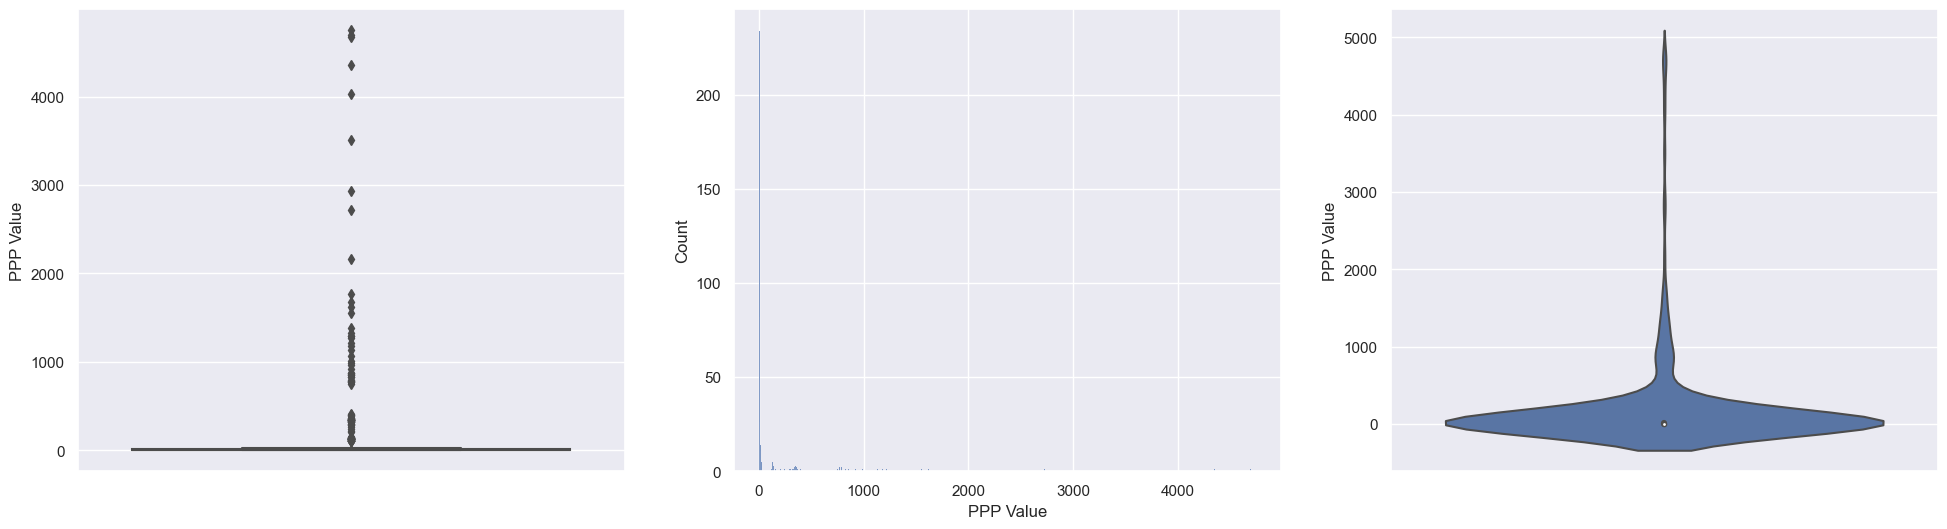

In [22]:
# Convert "PPP Value" column to numeric (if not already numeric)
y_train["PPP Value"] = pd.to_numeric(y_train["PPP Value"])

# Plotting the distribution of Response (PPP Value)
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(y=y_train["PPP Value"], orient="h", ax=axes[0])
sb.histplot(data=y_train["PPP Value"], ax=axes[1])
sb.violinplot(y=y_train["PPP Value"], orient="h", ax=axes[2])

plt.show()

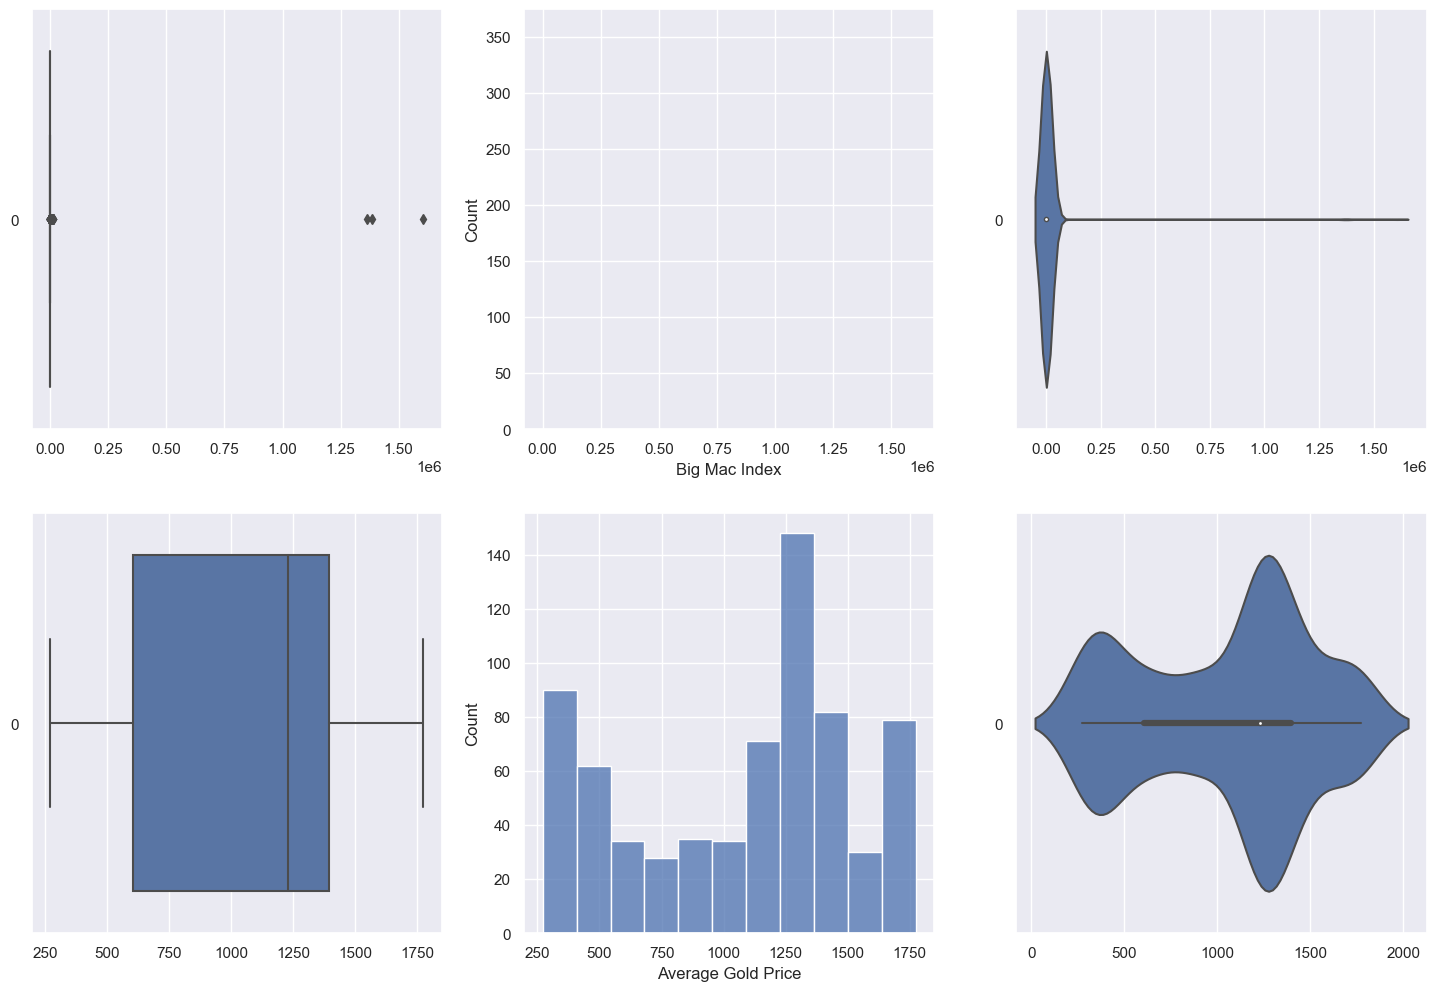

In [23]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(2, 3, figsize=(18, 12))

count = 0
for var in X_train:
    sb.boxplot(data = X_train[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = X_train[var], ax = axes[count,1])
    sb.violinplot(data = X_train[var], orient = "h", ax = axes[count,2])
    count += 1

<Axes: >

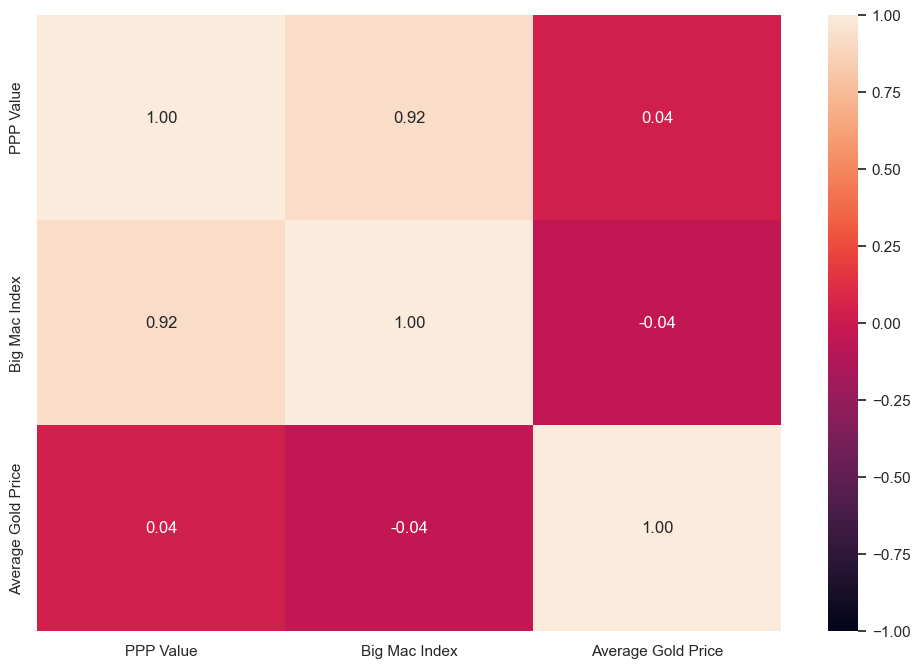

In [24]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [ ]:
# Relationship between Response and the Predictors
sb.pairplot(data = trainDF)